EXERCISE 2 - WATER

In [1]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define a linear model function
def f(x, a, b):
    return (a*x + b)
#define correction velocity function
def vcorr(v, r, D):
    return v/(1-(2.104*(2*r/D))+(2.089*((2*r/D)**2)))
#define function for the terminal velocity curve fit
def vwater(r, a, b):
    return a*(r**.5) + b
#define reduced chi squared function
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    chi = np.sum(((yi-vwater(xi, m, b))**2)/(sigma_i**2))
    chi = chi/v
    return chi

In [3]:
#define variables to run through columns in x and y data arrays
col1 = 0
col2 = 1  
#define arrays to store x and y data
xdata_w = np.zeros((16, 83))
ydata_w = np.zeros((16, 83))

#import data
for i in range(0,15):
    x, y = np.loadtxt("water data.csv", skiprows = 0, usecols = (col1, col2), delimiter = ',', unpack = True)
    for j in range(0, 83):
        xdata_w[i][j] = x[j]
    for k in range(0, 83):
        ydata_w[i][k] = y[k]
    col1+=2
    col2+=2   

In [4]:
#import radius data
radii_w, radii_g, r_err = np.loadtxt("bead radii.csv", skiprows = 0, delimiter = ',', unpack = True)

In [5]:
#store position and time error
position_err = 0.001
time_err = 0.01
#define array to store velocities
slopes = np.zeros(15)
slopes_err = np.zeros(15)
#array to store intercepts
ints = np.zeros(15)

#curvefit and store velocities from the posiiton vs time data
for k in range(0,15):
    i=0
    while xdata_w[k][i] != 0 or ydata_w[k][i] != 0:

        i+=1
        
    sig = np.zeros(i-1)
    for j in range(0, i-1):
        sig[j] = 0.001

    p_opt, p_cov = curve_fit(f, xdata_w[k][0:i-1], ydata_w[k][0:i-1], p0 = (1,1), sigma = sig, absolute_sigma = True)
    m_opt = p_opt[0]
    b_opt = p_opt[1]
    
    slopes[k] = m_opt
    ints[k] = b_opt

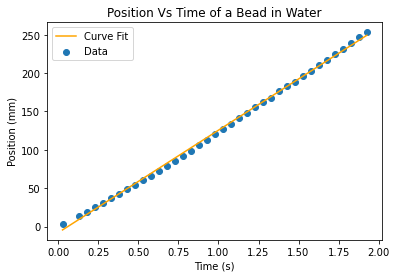

In [6]:
#sample plot for position vs time data
plt.scatter(xdata_w[13][0:38], ydata_w[13][0:38], label = "Data")
plt.plot(xdata_w[13][0:38], f(xdata_w[13][0:38], slopes[13], ints[13]), color = "orange", label = "Curve Fit")
plt.xlabel("Time (s)")
plt.ylabel("Position (mm)")
plt.title("Position Vs Time of a Bead in Water")

plt.legend(loc = "best")

In [10]:
#correct the velocities
v_corr = np.zeros(15)
for num in range(0,3):
    v_corr[num]=vcorr(slopes[num], radii_w[0], 96)
for num in range(3,6):
    v_corr[num]=vcorr(slopes[num], radii_w[1], 96)
for num in range(6,9):
    v_corr[num]=vcorr(slopes[num], radii_w[2], 96)
for num in range(9,12):
    v_corr[num]=vcorr(slopes[num], radii_w[3], 96)
for num in range(12,15):
    v_corr[num]=vcorr(slopes[num], radii_w[4], 96)
    
#average the corrected velocities
v_mean = np.zeros(5)
v_mean[0] = np.mean(v_corr[0:3])
v_mean[1] = np.mean(v_corr[3:6])
v_mean[2] = np.mean(v_corr[6:9])
v_mean[3] = np.mean(v_corr[9:12])
v_mean[4] = np.mean(v_corr[12:15])

#calculate error for the average velocities
v_mean_err = np.zeros(5)
v_mean_err[0] = np.std(v_corr[0:3])/np.sqrt(3)
v_mean_err[1] = np.std(v_corr[3:6])/np.sqrt(3)
v_mean_err[2] = np.std(v_corr[6:9])/np.sqrt(3)
v_mean_err[3] = np.std(v_corr[9:12])/np.sqrt(3)
v_mean_err[4] = np.std(v_corr[12:15])/np.sqrt(3)

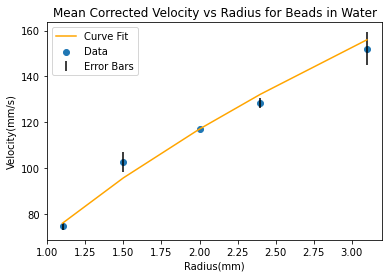

In [8]:
#plot velocity vs radius with curvefot and error bars
plt.scatter(radii_w, v_mean, label = "Data")

p_optw, p_covw = curve_fit(vwater, radii_w, v_mean, p0 = (19,70),  sigma = v_mean_err, absolute_sigma = True)
a = p_optw[0]
b = p_optw[1]
plt.plot(radii_w, vwater(radii_w, a, b), color = "orange", label = "Curve Fit")

plt.title("Mean Corrected Velocity vs Radius for Beads in Water")
plt.xlabel("Radius(mm)")
plt.ylabel("Velocity(mm/s)")

plt.errorbar(radii_w, v_mean, yerr=v_mean_err, color = "black", ls="none", label = "Error Bars")

plt.legend(loc = "best")

In [9]:
#calculate rydberg constants ad errors
R = (((2*radii_w)/10)*v_mean/10)/0.01
R_err =(v_mean/10)*(2*radii_w/10)*np.sqrt(((0.1/(2*radii_w/10)**2)+((v_mean_err/(v_mean/10)**2))))

In [18]:
#calculate reduced chi squared
chi(v_corr.size,2,v_mean,radii_w,v_mean_err,a,b)

0.49344064241892244